In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
sales_file_path = 'nyc-rolling-sales.csv'
sales_data = pd.read_csv(sales_file_path)
sales_data.columns =sales_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
sales_data.building_class_category=sales_data.building_class_category.str.strip().str.lower().str.replace(' ', '').str.replace('-', '_')
sales_data = sales_data.drop_duplicates(sales_data.columns, keep='last')
sales_data.describe() 

,unnamed:_0,borough,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [3]:
price=[]
land_square=[]
gross_square=[]
taxclass1=[]
taxclass2=[]
taxclass4=[]
Manhattan=[] #(1), 
Bronx=[] #(2), 
Brooklyn=[] #(3), 
Queens=[] #(4), 
State_Island=[]#5
buildingclass1=[]
buildingclass2=[]
buildingclass3=[]
buildingclass10=[]
buildingclass13=[]

In [4]:
for i in range(len(sales_data.sale_price)):
    price.append(0) if sales_data.sale_price[i]==' -  ' else price.append(float(sales_data.sale_price[i]))
    land_square.append(0) if sales_data.land_square_feet[i]==' -  ' else land_square.append(float(sales_data.land_square_feet[i]))
    gross_square.append(0) if sales_data.gross_square_feet[i]==' -  ' else gross_square.append(float(sales_data.gross_square_feet[i]))
    taxclass1.append(1) if sales_data.tax_class_at_time_of_sale[i]==1 else taxclass1.append(0)
    taxclass2.append(1) if sales_data.tax_class_at_time_of_sale[i]==2 else taxclass2.append(0)
    taxclass4.append(1) if sales_data.tax_class_at_time_of_sale[i]==4 else taxclass4.append(0)    
    Manhattan.append(1) if sales_data.borough[i]==1 else Manhattan.append(0)    
    Bronx.append(1) if sales_data.borough[i]==2 else Bronx.append(0)    
    Brooklyn.append(1) if sales_data.borough[i]==3 else Brooklyn.append(0)    
    Queens.append(1) if sales_data.borough[i]==4 else Queens.append(0)    
    State_Island.append(1) if sales_data.borough[i]==5 else State_Island.append(0)    
    buildingclass1.append(1) if sales_data.building_class_category[i]=='01onefamilydwellings' else buildingclass1.append(0)
    buildingclass2.append(1) if sales_data.building_class_category[i]=='02twofamilydwellings' else buildingclass2.append(0)
    buildingclass3.append(1) if sales_data.building_class_category[i]=='03threefamilydwellings' else buildingclass3.append(0)
    buildingclass10.append(1) if sales_data.building_class_category[i]=='10coops_elevatorapartments' else buildingclass10.append(0)
    buildingclass13.append(1) if sales_data.building_class_category[i]=='13condos_elevatorapartments' else buildingclass13.append(0)

In [5]:
sales_data['sale_date'] = pd.to_datetime(sales_data['sale_date'])
sales_data.sale_date = [item.to_julian_date() for item in sales_data.sale_date] 

sales_data['price'] =price
sales_data['land_square'] =land_square
sales_data['gross_square'] =gross_square
sales_data['taxclass1']=taxclass1
sales_data['taxclass2']=taxclass2
sales_data['taxclass4']=taxclass4
sales_data['Manhattan']=Manhattan
sales_data['Bronx']=Bronx
sales_data['Brooklyn']=Brooklyn
sales_data['Queens']=Queens
sales_data['State_Island']=State_Island
sales_data['buildingclass1']=buildingclass1
sales_data['buildingclass2']=buildingclass2
sales_data['buildingclass3']=buildingclass3
sales_data['buildingclass10']=buildingclass10
sales_data['buildingclass13']=buildingclass13

In [6]:
sales_data.describe()

,unnamed:_0,borough,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale,...,Manhattan,Bronx,Brooklyn,Queens,State_Island,buildingclass1,buildingclass2,buildingclass3,buildingclass10,buildingclass13
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,...,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,...,0.216516,0.083373,0.284418,0.316223,0.099470,0.215676,0.187207,0.051852,0.152600,0.153629
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,...,0.411872,0.276446,0.451140,0.465004,0.299294,0.411293,0.390080,0.221730,0.359603,0.360595
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


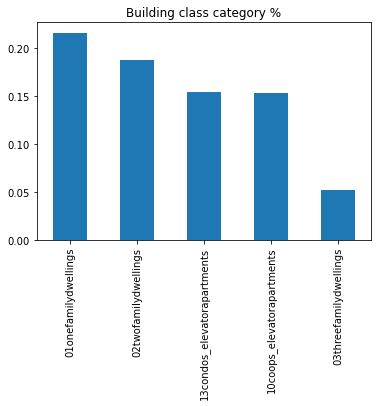

In [8]:
#print(sales_data.building_class_category.unique())
plt.title(r'Building class category %')
(sales_data['building_class_category'].value_counts().head() / len(sales_data)).plot.bar()